In [1]:
# python
import os
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout,  llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import coffea.util

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.161.147:8786' processes=10 threads=10, memory=28.87 GiB>

In [3]:
samples = [

      '2Mu2E_500GeV_0p25GeV_4p0mm',
     '2Mu2E_500GeV_1p2GeV_19p0mm',
     '2Mu2E_500GeV_5p0GeV_80p0mm',
  
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                  # max_files =10
                                   # max_files =1
                                )

In [4]:
channels = [
     #"baseNoLj", 
     "baseNoLj_A_ee_highPtA_lowLxyA",
     "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_glj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_eglj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_1elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_2elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_1glj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_2glj_highPT_lowLxyA",
   
    
   
    
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["lj_reco_effi_base",],
    # lj_reco_choices=["0.4"],
    # unweighted_hist=T,
   
)
runner = processor.Runner(
    # executor=processor.FuturesExecutor(),
    executor=processor.DaskExecutor(client=client),
    schema=llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    #skipbadfiles=True,
    savemetrics=True,
)
# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

2Mu2E_500GeV_5p0GeV_80p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_0p25GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_1p2GeV_19p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


In [5]:
coffea.util.save(output, f"output_files/electrons.coffea"  )

In [6]:
def plot_channels(sample, histogram, channels, legend=None, log=False, 
              density=False, folder_name=None, file_name=None, text=""):
    if legend==None:
        legend=channels
    if folder_name ==None:
        folder_name="my_plots"
    if file_name==None:
        file_name="_"
    os.makedirs(folder_name, exist_ok=True) 
    plt.figure(figsize=(12, 10))
    hists = output["out"][sample]["hists"][histogram]
    for c in channels:
        if density==True:
            utilities.plot(hists[c, :], density=True, yerr=True)
        else:
            utilities.plot(hists[c, :], density=False, yerr=True)
    plt.legend(legend)
    if log==True:
        plt.yscale("log")
    hep.label.exp_text(text=text, loc=2) 
    file_name=file_name+histogram
    save_path = os.path.join(folder_name, file_name)
    plt.savefig(save_path)
    plt.show()
    plt.close()
        

In [7]:
import mplhep as hep

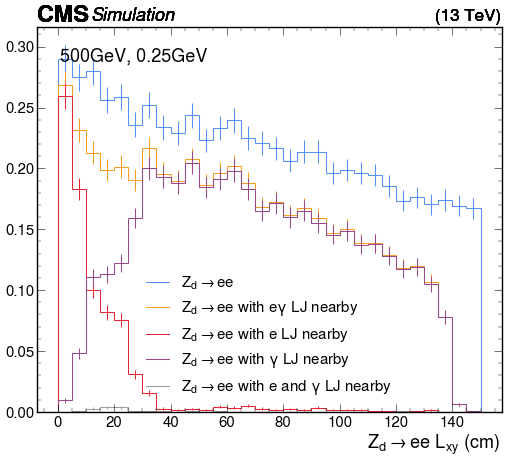

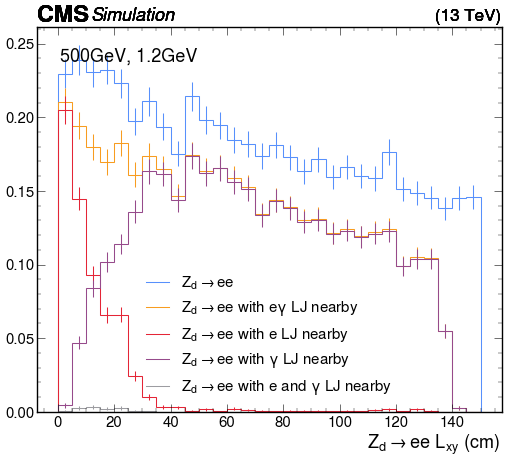

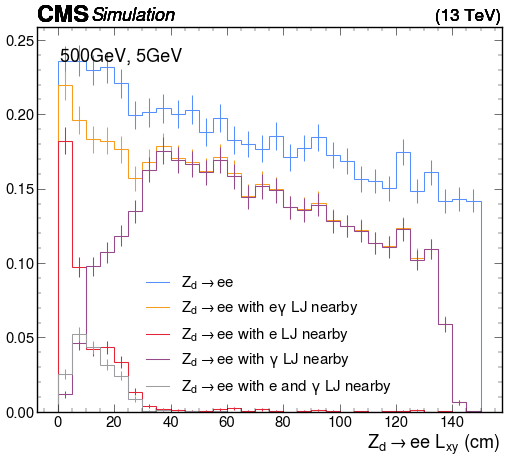

In [8]:
legend=[
    r"$Z_d \rightarrow ee $",
       r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       r"$Z_d \rightarrow ee$ with $e$ LJ nearby", 
       r"$Z_d \rightarrow ee$ with $\gamma$ LJ nearby",
       r"$Z_d \rightarrow ee$ with $e$ and $\gamma$ LJ nearby"]
channels = [
     #"baseNoLj", 
     "baseNoLj_A_ee_highPtA_lowLxyA",
     "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_glj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_eglj_highPT_lowLxyA",]
   
plot_channels("2Mu2E_500GeV_0p25GeV_4p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_0p25_", text="500GeV, 0.25GeV")
plot_channels("2Mu2E_500GeV_1p2GeV_19p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_1p2_", text="500GeV, 1.2GeV")
plot_channels("2Mu2E_500GeV_5p0GeV_80p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_5_", text="500GeV, 5GeV")

/usr/local/lib/python3.12/site-packages/mplhep/utils.py:652: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values(), variances) - self.values())
/usr/local/lib/python3.12/site-packages/mplhep/utils.py:652: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values(), variances) - self.values())


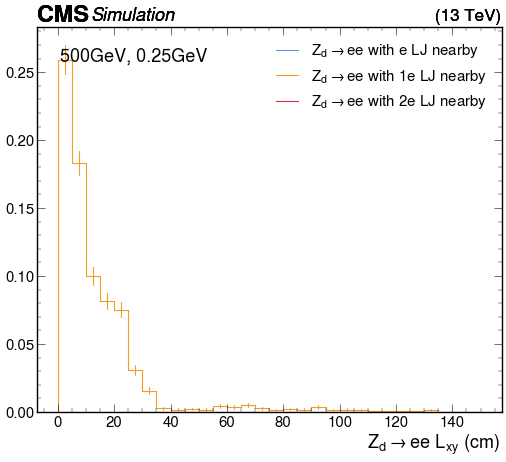

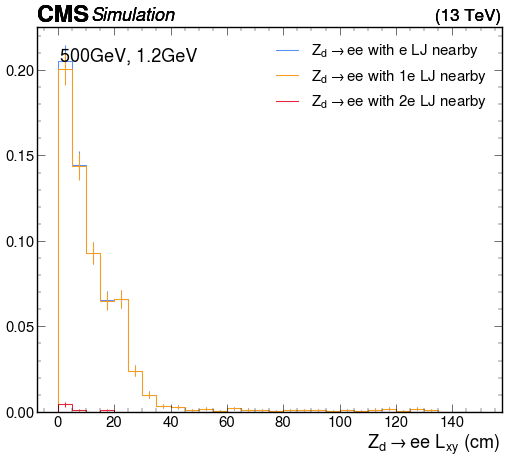

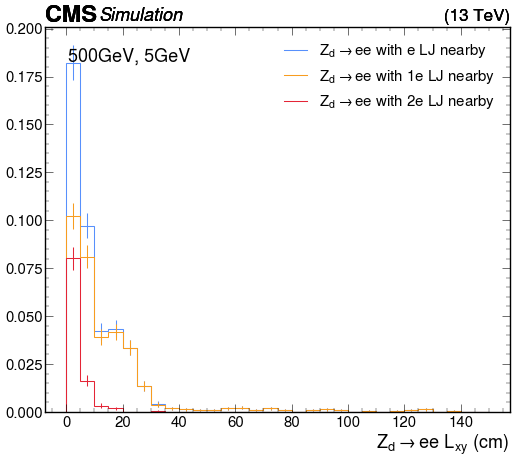

In [9]:
legend=[
    # r"$Z_d \rightarrow ee $",
       r"$Z_d \rightarrow ee$ with $e$ LJ nearby", 
       r"$Z_d \rightarrow ee$ with $1e$ LJ nearby",
       r"$Z_d \rightarrow ee$ with $2e$ LJ nearby"]
channels = [
     
     # "baseNoLj_A_ee_highPtA_lowLxyA",
     "baseNoLj_A_ee_matched_elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_1elj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_2elj_highPT_lowLxyA",]
   
plot_channels("2Mu2E_500GeV_0p25GeV_4p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_0p25_", text="500GeV, 0.25GeV")
plot_channels("2Mu2E_500GeV_1p2GeV_19p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_1p2_", text="500GeV, 1.2GeV")
plot_channels("2Mu2E_500GeV_5p0GeV_80p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_5_", text="500GeV, 5GeV")

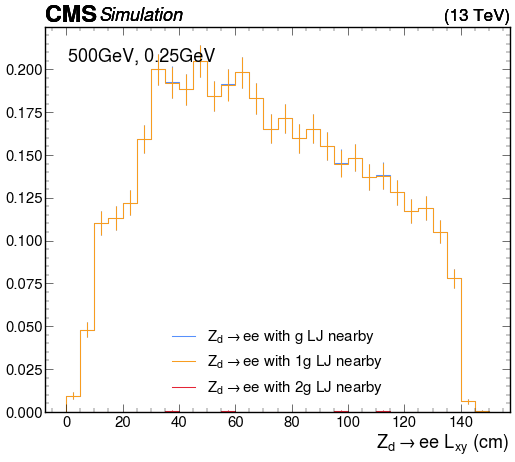

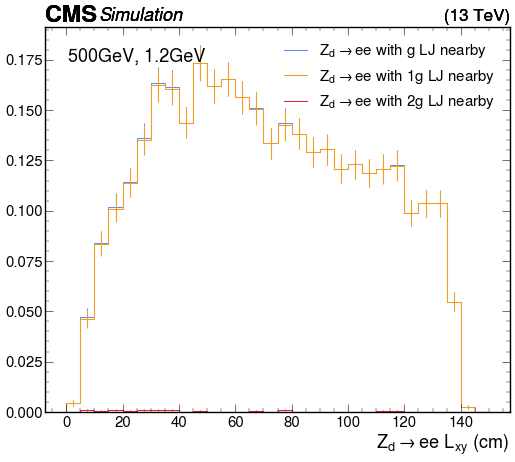

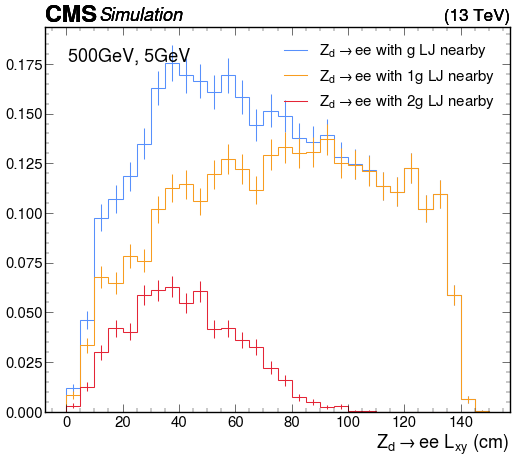

In [10]:
legend=[
    # r"$Z_d \rightarrow ee $",
       r"$Z_d \rightarrow ee$ with $g$ LJ nearby", 
       r"$Z_d \rightarrow ee$ with $1g$ LJ nearby",
       r"$Z_d \rightarrow ee$ with $2g$ LJ nearby"]
channels = [
     
     # "baseNoLj_A_ee_highPtA_lowLxyA",
     "baseNoLj_A_ee_matched_glj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_1glj_highPT_lowLxyA",
     "baseNoLj_A_ee_matched_2glj_highPT_lowLxyA",]
   
plot_channels("2Mu2E_500GeV_0p25GeV_4p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_0p25_", text="500GeV, 0.25GeV")
plot_channels("2Mu2E_500GeV_1p2GeV_19p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_1p2_", text="500GeV, 1.2GeV")
plot_channels("2Mu2E_500GeV_5p0GeV_80p0mm", "genAs_toE_lxy", channels, legend=legend,
             folder_name="separate_egamma", file_name="200_5_", text="500GeV, 5GeV")